### Basic plotting
There are a number of plotting options in python including:
* `matplotlib`
* `seaborn` 
* `plotly` 
* `ggplot`
* `altair` 

Matplotlib is the most versitile but probably requires the most interaction to get good quality figures. However, one advantage of matplotlib is that you can change any aspect of the plot using the pyplot api. 

**disclaimer** I have only ever used matplotlib, and even when trying other libraries fall back to matplotlib because of the easy customisation.

#### Matplotlotlib
Matplotlib has two interfaces using the **pyplot** API or using the **object-oriented** plotting. Pyplot provides some easy to use plotting functions and is great for creating quick plots but sometimes lacks the functionality of the object-oriented approach.

Matplotlib is usually imported as plt.
```Python
import matplotlib.pyplot as plt
```
To create a simple plot of x and y data we can use the `plot` function.
```Python
plt.plot([0,1],[0,1])
```
Would plot the data points (0,0) and (1,1) with a line connecting them. We can change the style of the plot by adding another argument to the function which specifies the format - the figure below will show some examples. 

More information about plotting using matplotlib can be found on the [matplotlib documentation](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot). We will cover more advanced examples next week combining with numpy and scipy to do curve fitting and image analysis/manipulation.

### Using the quick plotting api

Text(0, 0.5, 'x axis label')

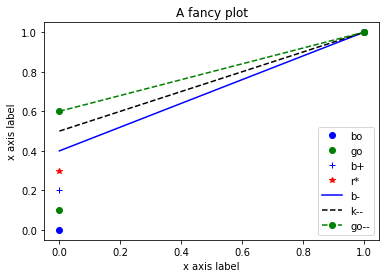

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
symbols =['bo','go','b+','r*','b-','k--','go--']
for i, s in enumerate(symbols):
    plt.plot([0,1],[i/10,1],s,label=s)
plt.legend()
plt.title("A fancy plot")
plt.xlabel("x axis label")
plt.ylabel("x axis label")

### Using the object oriented plotting
The object oriented approach is better for more complex figures as you have more specific control over the elements of the plot you are changing. We need to change a few lines of code, so we have to use the `set_title` and `set_xlabel` to change the text in the plot. 

Text(0, 0.5, 'x axis label')

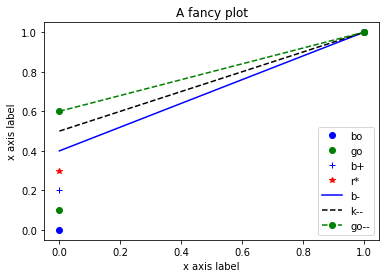

In [15]:
fig, ax = plt.subplots(1)
symbols =['bo','go','b+','r*','b-','k--','go--']
for i, s in enumerate(symbols):
    ax.plot([0,1],[i/10,1],s,label=s)
ax.legend()
ax.set_title("A fancy plot")
ax.set_xlabel("x axis label")
ax.set_ylabel("x axis label")

More axes can be added to the plot

In [16]:
new_ax = fig.add_subplot?

In [ ]:
new_ax = fig.add_subplot

In [17]:
new_ax.plot([0,1],[i/10,1],'r*')

In [18]:
fig.show()

<ipython-input-18-6ebedab27258>:1: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


### Creating a figure with multiple axes
Alternatively, a figure with multiple subplots can be created using the `plt.subplots` method where the arguments of the function are:
- number of rows `int=1`
- number of columns `int=1`
- sharex, sharey `bool=False` or `none, all, row col`
- squeeze: `bool=True`

sharex and sharey allow you to create a figure where the x or y axis for parts or all of the figure are shared


### Exercise 
Create a subplot with two columns and 1 row and plot a histogram of 1000 samples from a normal probability density function with a mean of 0 and standard deviation of 1 in the first axis. Plot a histogram of another normal distribution with a mean of 0 and a standard deviation of 10. 
This should look something like this.
[!normal pfds]('images\normal_pdfs.png')

Now try and change this figure so that the x and y axis ranges are the same for both plots.

### Adding two plots to an axis
In some cases you may want to plot two variables which share a common x axis on the same plot, however you want to use a separate y axis. 

This can be done by duplicating the existing axis to create an invisible x axis and adding a new y axis on the right using the `twinx()` method.

For example lets plot both the probability density function of a normal distribution and the histogram for a random variable sampled from a normal distribution.

Hints: 
1. We can use the normal distribution function from `scipy.stats.norm` - once you have created an instance of a normal distribution e.g. `rv = scipy.stats.norm()` you can return the value of the probability function at a point. 
2. The hist method from matplotlib returns three variables - the number of items in a bin, the value of the bin and the plot object (a patch). We can use the value of the bin as the x axis value.

```Python
from scipy.stats import norm
fig, left_ax = plt.subplots(1)
n, bins, patches = left_ax.hist(np.random.normal(0,1,1000),alpha=0.2,bins=20)
rv = norm()
right_ax = left_ax.twinx()
right_ax.plot(bins,rv.pdf(bins))


### Exercise
Repeat this for the normal distributions from before for both plots and try to add labels to the x axes and y axes.

## Cross plots
One of the most useful plots for preliminary data analysis and investigation is the cross plot. We can create a cross plot using matplotlibs `scatter` function. To create a simple scatter plot we can use `scatter(variable1,variable2)`.
We can add additional arguments to try and extend our analysis of the data. 
 - `c` can be used to specify a variable to colour the dataset by
 - `s` can be used to specify a variable to change the marker size

### Exercise
Load in the dataset 'data/scatter_plot.csv', it should be a dataframe with 100 rows and 5 columns. Test different combinations of variables to determine whether there is any relationship between the data in each column. 

### Exercise
Now try and create a matrix of cross plots using subplots comparing each variable.

In [52]:
plt.scatter?

In [50]:
data = np.zeros((100,5))
data[:,0] = np.linspace(0,10,100)+np.random.normal(0,.2,100)
data[:,1] = np.sin(data[:,0])+np.random.normal(0,.1,100)
data[:,2] = np.exp(data[:,1])+np.random.normal(0,.5,100)
data[:,3] = data[:,1]*data[:,2]+np.random.normal(0,1,100)
data[:,4] = np.random.random(100)

In [56]:
np.save_text('scatter_plot.csv',data)

AttributeError: module 'numpy' has no attribute 'save_text'

In [ ]:
np.

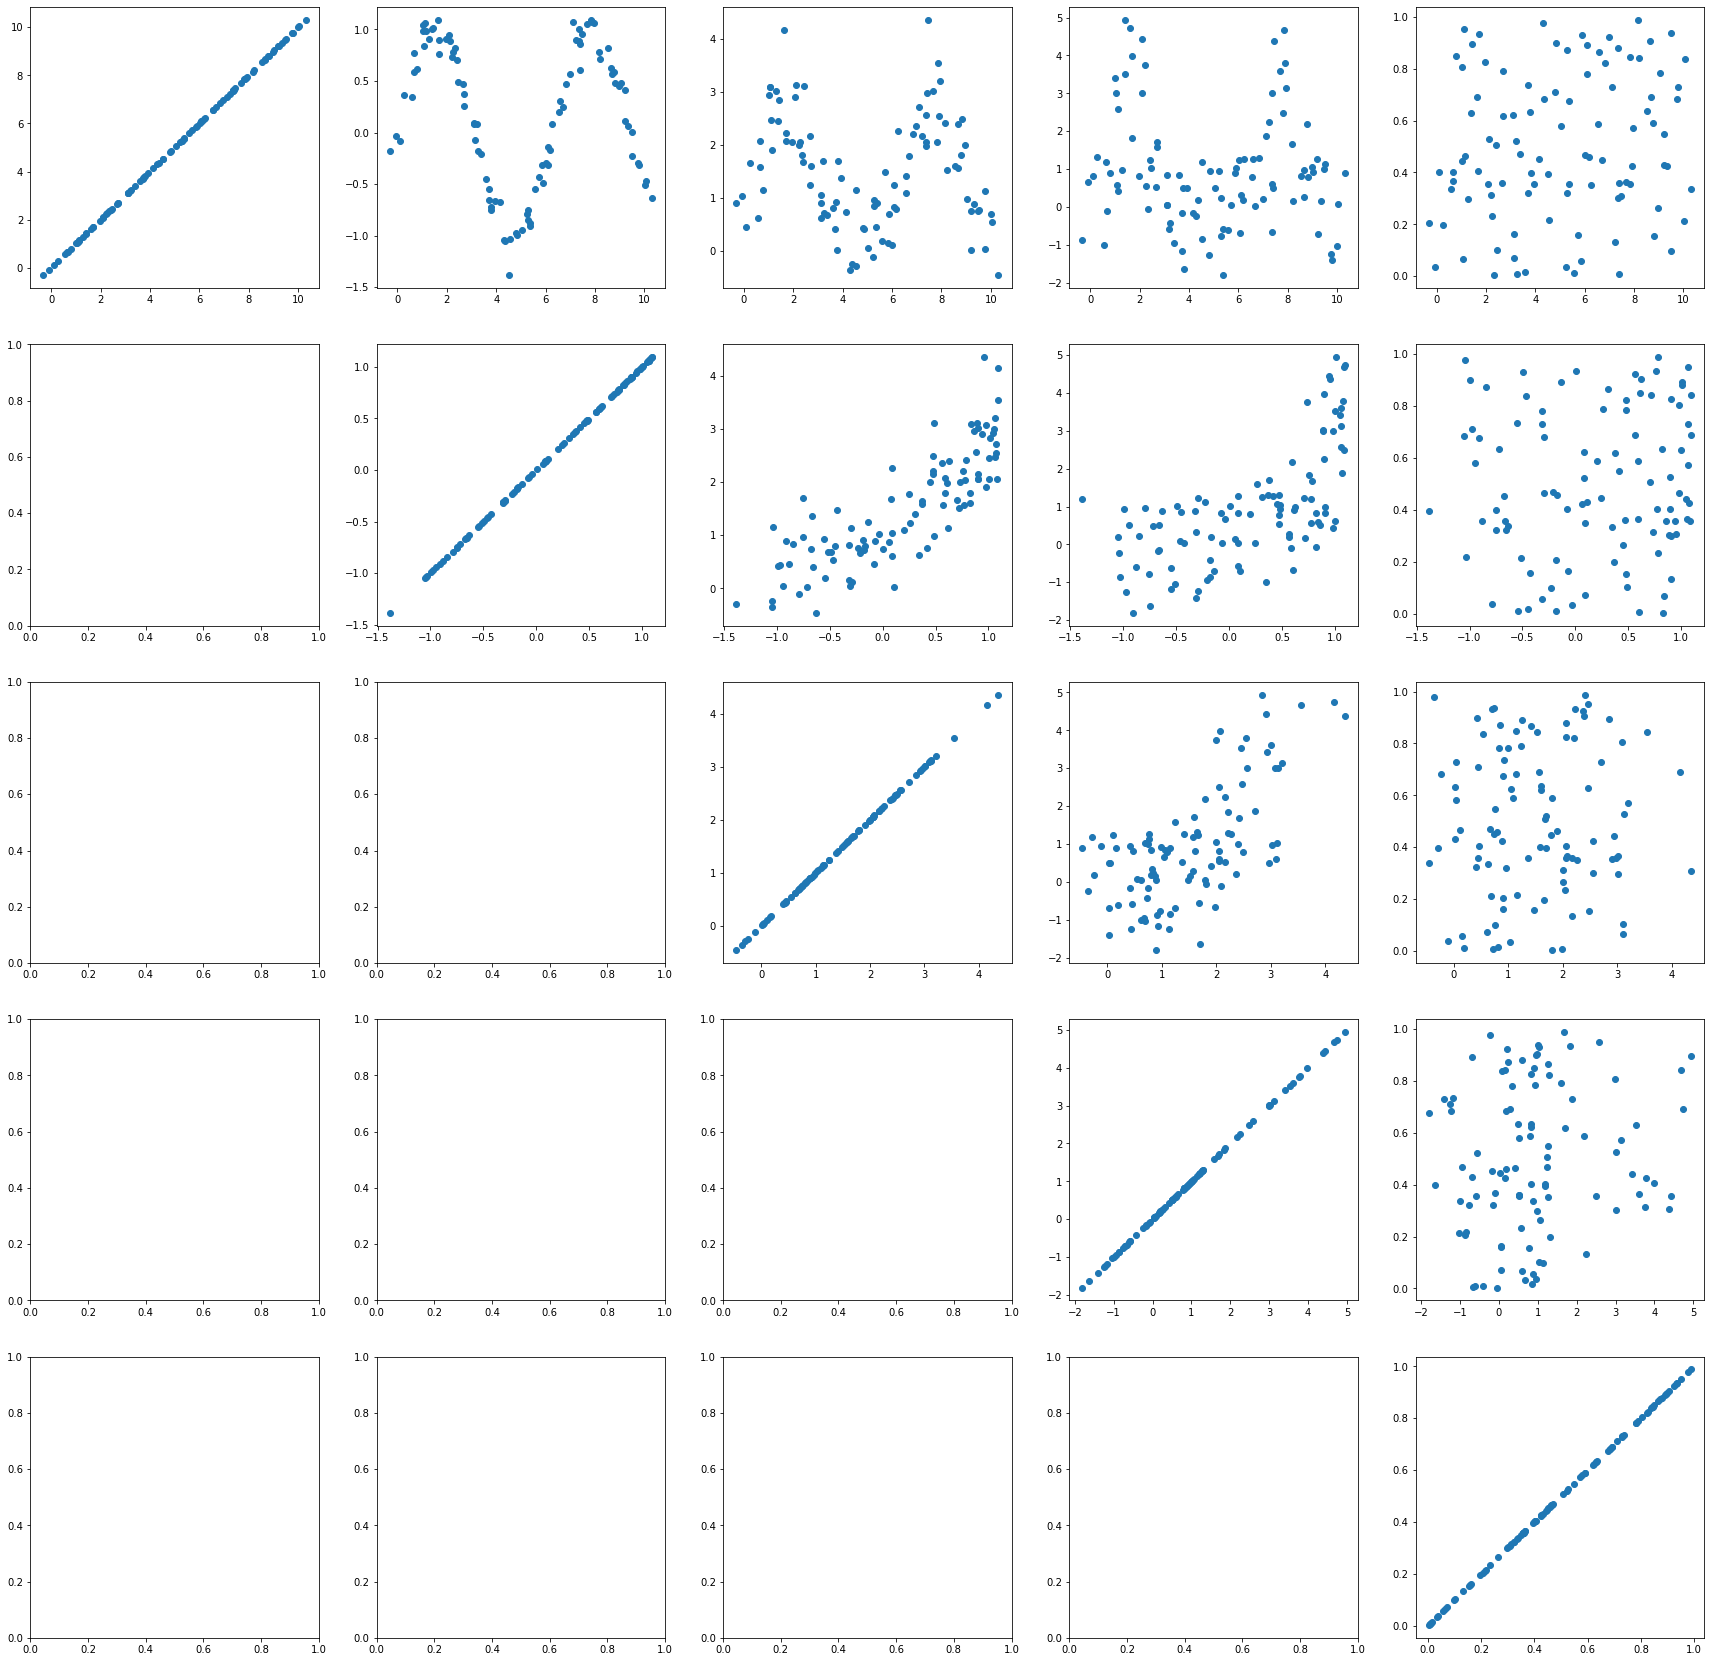

In [51]:
fig, ax = plt.subplots(5,5,figsize=(30,30))
for i in range(5):
    for j in range(i,5):
        ax[i,j].scatter(data[:,i],data[:,j])


### Plotting 2-D arrays as images
A 2-D array can be plotted as images using the functions `imshow` - which interpolates the colours to produce a continuous image, `contour` - creates contours of the values or `contourf` - creates a discrete colourmap (filled contours)

```Python
x = np.linspace(0,1,100)
y = np.linspace(0,1,100)
xx,yy = np.meshgrid(x,y) ## meshgrid converts an 1-d x and y coordinates into a 2-D grid of coordinates  

plt.imshow(xx)
```
* `cmap` - colourmap 
* `vmax` - maximum value of the colour map
* `vmin` - minimum value of the colour map
* `extent` - (left,right,bottom,top)

Exercise:
1. Try plotting a 2D map of the function $v = sin(x \times 2)+y \times 5$

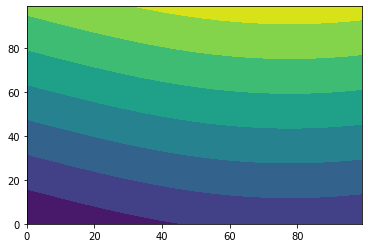

## Importing an image 
Images can be imported as arrays in python. The most basic way of importing an image is to use the `plt.imread(path)`.

Images are imported as either (M,N) arrays for grayscale images, (M, N, 3) for RGB images or (M, N, 4) for RGBA images.
Once the image is imported into python the values of the pixels will usually range between 0 and 255. 

To display an image using matplotlib we can use the `imshow` method (either from an axes or from the plt module). 

### Exercise
1. Import and display `data/image_exercise.png`
2. Create a histogram of the image channels
3. Convert the image into a grayscale image by combining the RGB components


In [70]:
plt.imread?

In [58]:
import skimage

### Advance Exercise


In [67]:
image = skimage.data.astronaut()

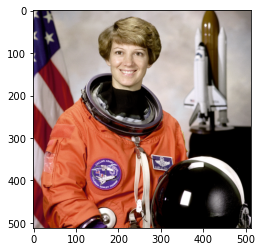

In [69]:
plt.imshow(image)

In [73]:
grayscale_image = np.sum(image,axis=2)

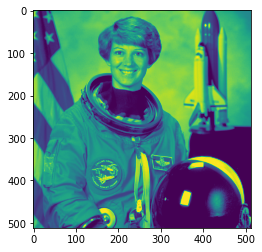

In [74]:
plt.imshow(grayscale_image)

In [96]:
dx_mask = np.array([[0,0,0],
                    [-0.5, 0, 0.5],
                    [0,0,0]])
dy_mask = np.array([[0,0.5,0],
                    [0,0,0],
                    [0,-0.5,0]])
neighbours = np.array([[-1,0,1,-1,0,1,-1,0,1],
                       [1,1,1,0,0,0,-1,-1,-1]])

In [102]:
ix, iy = np.meshgrid(np.arange(1,grayscale_image.shape[0]-1),np.arange(1,grayscale_image.shape[1]-1))

In [103]:
ix_neighbours = (ix[:,:,None] + neighbours[None,None,0])
iy_neighbours = (iy[:,:,None] + neighbours[None,None,1])

dx_mask_tiled = np.tile(dx_mask.flatten(),(iy_neighbours.shape[0],iy_neighbours.shape[1],1))
dy_mask_tiled = np.tile(dy_mask.flatten(),(iy_neighbours.shape[0],iy_neighbours.shape[1],1))


In [104]:
ix_neighbours.shape

(510, 510, 9)

In [108]:
image_dx = np.zeros(ix_neighbours.shape[0:2])

In [121]:
image_dx = np.sum(dx_mask.flatten()[None,None,:] * grayscale_image[ix_neighbours,iy_neighbours],axis=2)
image_dy = np.sum(dy_mask.flatten()[None,None,:] * grayscale_image[ix_neighbours,iy_neighbours],axis=2)


In [122]:
image_dx

array([[ 99.5,  99. ,  63. , ...,   5.5,  -7. ,  -8. ],
       [137. , 122.5,  74.5, ...,  -8.5,   2. ,  -4. ],
       [135. , 124. ,  79. , ...,  -6.5, -15. , -14.5],
       ...,
       [ -1.5,  -1.5,  -7.5, ..., -20. ,  29. ,  88. ],
       [  1.5,  -1.5,  -3.5, ...,   0. ,   0.5,   0. ],
       [  5.5,   4.5,  -1. , ...,   0.5,   1. ,   1. ]])

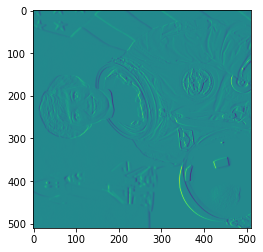

In [123]:
plt.imshow(image_dx)

In [1]:
plt.imshow(image_dy)

NameError: name 'plt' is not defined